## ETAPE 1 : Les algo de bases du RL

# Yo la team, 

Dans un premier temps, on va simplifier le probleme, on va prendre quelque chose de dim fini, le but pour l'instant et de coder la fameuse slide :

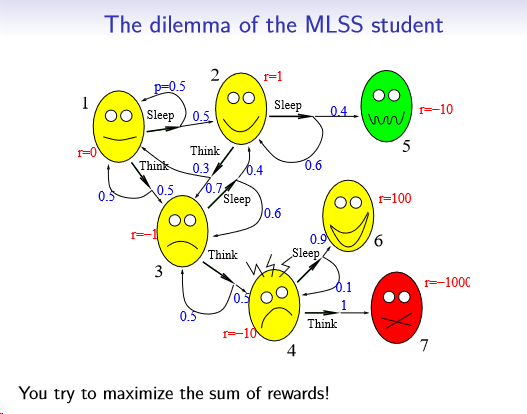



Donc, un étudiant qui est dans un certain état (1,2,...,7) à le choix à chaque moment entre deux action soit dormir soit travailler , selon son action il change d'état (selon une certaine proba) 


A chaque action on touche la récompense r de l'état on l'on tombe,cela jusqu'à atteindre un etat terminal.


Le but est de trouver une politique qui permet de max la somme des récompense avant d'arriver dans un etat final 

Quelques notation :

Les ensembles :


$ X $ l'ensemble des états de dim fini 

$ A(s) $ l'ensemble des actions possibles à partir d'un état $ s \in X$ de dim fini aussi et $A^*$ l'union des $A(s)$


Les var : 

$ x_1,x_2,...,x_n $ et $ a_1,a_2,..., a_n$ des suite de var d'états et d'actions qui vérifie la pté des chaines de Markov :

$$ P(x_{i+1}|x_1,x_2,...,x_i,a_1,a_2,..., a_i)= P(x_{i+1}|x_i,a_i)$$

Donc en gros la var $x_{i+1}$ ne dépend que de l'état et l'action précédente $ x_i,a_i $ . La quantité : 

$$T(y,a,x) = P(x_{i+1}= x|x_i=y,a_i=a)$$

est appellé la proba de transition de $y$ à $x$ sous l'action $a$. Il suffit de connaitre les proba de transition pour connaitre tous le systeme dans une chaine de Markov:
$$ T: X\times X \times A \longrightarrow [0,1]$$



est la matrice de transition (cf maths C ens 2018). 


Attention à l'ordre des variables perso j'aime bien utilisé la notation (tres peu officiel) :

$$ T(y,a,x) = P(y \stackrel{a}{\longrightarrow} x) $$

Que j'aime bien utiliser pour des raisons visuels. 



$r(x,a) $ est la recompense (variable aléatoire) que l'on a en effectuant en $x$ l'action $a$, elle est égale à $R(x')$ où $x'$ est l'état d'arrivé en partant de $x$ avec l'action $a$.
$$ r(x,a)= R(x') $$










# Premiere mission !

Coder un environnement ! qui partant des proba de transition $ T(x,y,a) $ et des récompense $R(x)$ simule une évolution ( une trajectoire $x_1,x_2,...,x_i$ ) possible, on suppose pour simplifier que $A(s) =A^*$ i.e toute les actions sont possibles à partir de n'importe quel état.


J'ai besoin de plusieurs fonctions vous pouvez vous répartir le travail :

In [2]:
import numpy as np 

class Environnement : 
    """Les états sont représenté par des entier de 0 à n-1 et les action de 0 à m-1 """
    def __init__ (self,T,R,n,m): # T la matrice de transition, R le vecteur des récompenses 
        self.m_T=np.copy(T)
        self.m_R=np.copy(R)
        self.m_n=n
        self.m_m=m
        self.m_dim=len(R)
       
        
    def etat_suivant (self,s,a):
        """Retourne l'état suivant s apres l'action a (aléatoire mais suit la proba T)"""
        u=np.random.random() #on tire un nombre aléatoire entre 0 et 1
        som=0
        for i in range(self.m_dim):
            som+=self.m_T[s,a,i]
            if u<=som:
                return i
        
    
    def récompense(self,s,a):
        """Retourne la récompense suivant s apres l'action a (aléatoire mais suit la proba T)"""
        return self.m_R[s,a]
    
    
    def trajectoire_aléatoire (self,si,k):
        """donne une trajectoire aleatoire de taille k partant de si construite en choisissant une action au pif """
        if k== 0:
            return [(si,0)]
        else :
            a= numpy.random.choice(numpy.array(self.m_A[si])) #choix d'une action au hasard parmi toutes celles qui 
            #sont possibles en si
            sp = self.etat_suivant(si)
            r = self.récompense(s,a)
            return (si,r)+ self.trajectoire_aléatoire (sp,k-1) #la boucle se termine bien
        
    

# Politique 

Donc maintenant qu'on notre environnement, le but maintenant et de mettre en place une stratégie pour maximiser la somme des récompenses dans le temps.


On appelle politique(déterministe) $\Pi $ une application de $S$ vers $A^*$, en gros c'est le choix d'action que va faire notre individu.


Exemple : notre ind qui suit la politique $\Pi$ est dans l'état $s$ il va donc effectuer l'action $\Pi(s)$

Exo : rajouter la fonction $\mathtt{trajectoirepi (self,si,k,pi)}$ dans la classe où l'ind ne choisi plus aléatoire ses actions. 


In [ ]:
def trajectoirepi(self,si,k,pi):
    """donne une trajectoire de taille k et les récompenses collectées à partir de l'état si où 
    le choix des actions successives respecte la politique pi"""
    if k==0:
        return [(si,0)]
    else:
        a=pi[si]
        sp=self.etat_suivant(si,a)
        r=self.récompense(si,a)
        return [(si,r)]+self.trajectoirepi(sp,k-1,pi)
        

# Mise en place de la classe environnement version presque finale 

On ne suppose plus que  $A(s) =A^*$, quelques nouvelles notions :

Lorsque $A(s) = \emptyset $, l'état $s$ est dit terminal, l'ind a fini son parcours, il n'a plus aucun choix d'action (exemple : les états 5,6 et 7 dans l'image sont terminaux) 


Lorsque que $a$ n'appartient pas $A(s)$ ça n'a pas de sens d'évoquer une proba de transition du style $ P(s \stackrel{a}{\longrightarrow} s')$ puisqu'on ne peut pas effectuer l'action $a$ de l'état $s$.

On code la fonction $A$ comme un vecteur  d'ensemble  $\mathtt{A}$ par exemple  $\mathtt{A[i]= \{1,2,3\}}$:
  

Voila la version complete, j'ai un peu changé des trucspas rapport au premieres def mais rien de bien important.

In [34]:
import numpy as np

class Environnement : 
    """Les états sont représenté par des entier de 0 à n-1 et les action de 0 à m-1 """
    def __init__ (self,T,R,A,m,gamma): # T la matrice de transition, R le vecteur des récompenses et A les ensembles d'action
        self.m_T = np.copy (T)
        self.m_A = np.copy (A)
        self.m_R = np.copy (R)
        self.m_m=m
        self.m_dim= len (R)
        self.m_gamma = gamma
    
    def dimension(self): 
        return self.m_dim
        
    
    def actions_possibles (self,s):
        """donne la liste des actions possibles de l'état s"""
        return self.m_A[s]
    
    def est_terminal(self,s):
        """indique si l'état s est terminal"""
        return self.m_A[s]=={}
    
    def etat_suivant (self,s,a):
        """Retourne l'état suivant s apres l'action a (aléatoire mais suit la proba T)"""
        u=np.random.random()
        som=0
        for i in range(self.m_dim):
            som+= self.m_T[s,a,i]
            if u<=som :
                return i
            
    
    def récompense(self,s,a):
        """Retourne la récompense suivant s apres l'action a (aléatoire mais suit la proba T)"""
        return self.m_R[s,a]
    
    def trajectoire_aléatoire (self,si,k):
        """donne une trajectoire et les récompenses aleatoire de taille k partant 
        de si construite en choisissant une action au pif """
        if k== 0 or self.est_terminal(si) :
            return [(si,0)]
        else :
            a= np.random.choice(np.array(list(self.m_A[si]))) #choix d'une action au hasard parmi toutes celles qui 
            #sont possibles en si
            sp = self.etat_suivant(si,a)
            r = self.récompense(si,a)
            return [(si,r)]+ self.trajectoire_aléatoire(sp,k-1)
        
        
    
    def trajectoire_aléatoire2 (self,si):
        """donne une trajectoire et les récompenses aleatoire partant de si construite
        en choisissant une action au pif et se terminant
        sur un état terminal"""
        if  self.est_terminal(si) :
            return [(si,0)]
        else :
            a= np.random.choice(np.array(list(self.m_A[si])))
            sp = self.etat_suivant(si,a)
            r = self.récompense(si,a)
            return [(si,r)]+ self.trajectoire_aléatoire2(sp)
        
    def trajectoire_pi (self,si,k,pi):
        """donne une trajectoire et les récompenses de taille k partant de si construite 
        en respectant la politique pi """
        if k== 0 or self.est_terminal(si) :
            return [(si,0)]
        else :
            a= pi[si]
            sp = self.etat_suivant(si,a)
            r = self.récompense(si,a)
            return [(si,r)]+ self.trajectoire_pi(sp,k-1,pi)
        
    def trajectoire_pi2(self,si,pi):
        """donne une trajectoire et les récompenses partant de si construite en respectant
        la politique pi et se terminant
        sur un état terminal"""
        if self.est_terminal(si) :
            return [(si,0)]
        else :
            a= pi[si]
            sp = self.etat_suivant(si,a)
            r = self.récompense(si,a)
            return [(si,r)]+ self.trajectoire_pi2(sp,pi)

# Résolution avec connaissance des proba, équation de l'homme cloche 


Nous allons résoudre dans un premier temps le problème en admettant que l'on connaisse les proba de transition. Nous allons résoudre le probleme en utilisant une équation célebre de la programmation dynamique appellé équation de Bellman. 


On peut définir la fonction valeur $V^{\pi}$ comme la somme actualisé d'une constante $\gamma$ (entre 0 et 1) des récompenses futurs anticipés d'un individu partant de x: 

$$ V^{\pi} (x)= \mathbb{E}[\sum_{t=0}^{\infty} \gamma^t r(x_t,\pi(x_t))|x_0=x, \pi]$$

On note $V^*$ la valeur max (de la meilleure politique): $$ V^* = \text{max}_{\pi} V^{\pi} $$

On note $\pi^*$ la meilleure politique.

On dispose alors de l' équation de Bellmann (qui se démontre grace à la pté des chaines de Markov) :
$$ V^{\pi} (s)= \mathbb{E}( r(s,\pi(s))) +\gamma\sum_{s'\in X} P(s \stackrel{\pi(x)}{\longrightarrow} s') V^{\pi} (s')$$

Ainsi  :

$$V^*(s)= \max_{a\in A(s)}[\mathbb{E}( r(s,a)) +\gamma\sum_{s'\in X} P(s \stackrel{a}{\longrightarrow} s') V^* (s')]$$

On reconnais, alors une équation du type $V^*=f(V^*)$, on a alors qu'a utiliser une methode de point fixe (exemple Picard marche tres bien si $\gamma <1$) pour trouver $V^*$.

Pour simplifier d'un poil le prochain algo, on suppose que $r(x,\pi(x))$ est une constante (ie la récompense n'est plus une var), l'algo marche aussi si $r(x,\pi(x))$ n'est pas une constante il faudra juste l'appliquer en spécifiant $r(x,\pi(x))$ à son espérance avant d'executer l'algo.


Les équations du Belle Homme donne alors :

$$V^*(s)= \max_{a\in A(s)}[ r(s,a) +\gamma\sum_{s'\in X} P(s \stackrel{a}{\longrightarrow} s') V^* (s')]$$

Donc, nous allons coder en deux étapes et en dim fini ( la fonction $V^*$ devient un vecteur de $\mathbb{R}^n$)


Etape 1 : coder $f$ 


Etape 2 : itérer $f$ jusqu'à avoir convergence 







In [102]:

def norme (X):
    """Donne le carré de la norme euclidienne du vecteur X"""
    return sum (X*X)

class Value_iterative :
    def __init__ (self,T,A,R,gamma):
        self.m_T = np.copy (T)
        self.m_A = np.copy (A)
        self.m_R = np.copy (R)
        self.m_gamma = gamma
        
    def f (self, V):
        """La fonction donnée par l'équation de Bellman sur la value fonction retourne f(V) et la politique choisi"""
        n=len(V)
        resV =np.zeros(n)
        pi=np.zeros(n)
        for i in range (n):
            m= 0
            b= False 
            for a in self.m_A[i]:
                S= self.m_R[i,a] + self.m_gamma*sum ([(self.m_T[i,a,j]*V[j]) for j in range(n)])
                if m< S or b==False :
                    m=S 
                    b=True
                    pi[i]=a
            resV[i]= m
        return (resV,pi)
    
    def V_and_pi_star (self,epsilon): 
        """Itération de f pour converger vers le point fixe"""
        n=len(self.m_A)
        V = np.zeros(n)
        (Vp,pi_res) = self.f(V)
        while norme (V-Vp)> epsilon :
            W=Vp
            (Vp,pi_res)=self.f(Vp)
            V=W
        return (Vp,pi_res)       
        
        
        

Remarques : 

Cette algo converge trés rapidement si $\gamma <1$ (théorème de Picard)


Cette algo fonctionne egalement si $\gamma = 1$ et que toute trajectoire converge presque surement vers un etat final, par contre la vitesse de convergence est moins évidente.

# Premier test unitaire 

On va tester notre algo VI, sur un cas simple où la politique optimale est facile à justifier.


On considère un segment de $n$ cases. L'individu qui ce trouve sur une case $i$ a deux choix soit se tourner à gauche, soit à droite.


Si il est à droite il a une proba d'avancer de $0,75$ et de reculer de $0,25$ et inversement si il est tourné vers la gauche.


A chaque fois qu'il bouge d'une case il recoit une récompense $-i$


La case $0$ est terminal.


Donc la bonne strategie pour max la récompense est de toujours se tourner à gauche.

In [1]:
n= 20 

import numpy as np

A =[{}]+[{1,2} for i in range(1,n-1)] + [{1}]
R= np.array([[0,-i,-i] for i in range (n)])
T =np.zeros([n,3,n])
T[n-1,1,n-2]=1
for i in range (1,n-1):
    T[i,1,i-1]=0.75
    T[i,1,i+1]=0.25
    T[i,2,i-1]=0.25
    T[i,2,i+1]=0.75

In [108]:
VI= Value_iterative(T,A,R,1)

In [109]:
VI.V_and_pi_star(0)

(array([   0.        ,   -2.99999995,   -7.99999979,  -14.99999933,
         -23.99999794,  -34.99999375,  -47.99998121,  -62.99994358,
         -79.99983067,  -98.99949197, -119.99847587, -142.99542755,
        -167.9862826 , -194.95884776, -223.87654324, -254.62962966,
        -286.88888891, -319.66666669, -350.00000003, -369.00000003]),
 array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1.]))

Cela marche, donc on est heureux 

# Un formalisme plus poussé pour plus d'efficacité 


Reprenons l'équation de Bellman : 

$$ V^{\pi} (s)=  r(s,\pi(s)) +\gamma\sum_{s'\in X} P(s \stackrel{\pi(s)}{\longrightarrow} s') V^{\pi} (s')$$

On remarque que $V^{\pi}$ est le point fixe d'un opérateur $\mathcal {T}^{\pi}$ que l'on peut définir comme :


Pour toute fonction $W$ de $X$ dans $\mathbb(R)$ : 

$$ \mathcal {T}^{\pi}W(s) =  r(s,\pi(s)) +\gamma\sum_{s'\in X} P(s \stackrel{\pi(x)}{\longrightarrow} s') W(s')$$

En effet, 

$$ \mathcal {T}^{\pi}V^{\pi}=V^{\pi}$$

Cette opérateur est l'opérateur de Bellman. On peur aussi le définir pour sa version optimale ( celui que l'on a codé sous le nom de $f$). Que l'on appelle opérateur dynamique : 

$$ \mathcal {T}W(s) = \max_{a\in A(s)}[r(s,a) +\gamma\sum_{s'\in X} P(s \stackrel{a}{\longrightarrow} s') W(s')]$$

où 

$$\mathcal {T}V^*=V^*$$

Donc, on peut utiliser la même méthode de programmation dynamique pour calculer $V^{\pi}$ ou $V^*$, il suffit de coder d'abord l' opérateur de Bellman et l'opérateur dynamique.



In [111]:
class BellmanOperator :
    def __init__ (self,T,A,R,gamma):
        self.m_T = np.copy (T)
        self.m_A = np.copy (A)
        self.m_R = np.copy (R)
        self.m_gamma = gamma
    
    def dimension (self):
        return len(m_R)
        
    def TPi_op (self,V,pi):
        """Operateur de Bellman pour une politique pi"""
        n=len(V)
        resV =np.zeros(n)
        for i in range (n):
            resV[i]= self.m_R[i,pi[i]] + self.m_gamma*sum ([(self.m_T[i,pi[i],j]*V[j]) for j in range(n)])      
        return resV
    
    def T_op (self, V):
        """Opérateur dynamique de Bellman retourne aussi la politique utilisée """
        n=len(V)
        resV =np.zeros(n)
        pi=np.zeros(n)
        for i in range (n):
            m= 0
            b= False 
            for a in self.m_A[i]:
                S= self.m_R[i,a] + self.m_gamma*sum ([(self.m_T[i,a,j]*V[j]) for j in range(n)])
                if m< S or b==False :
                    m=S 
                    b=True
                    pi[i]=a
            resV[i]= m
        return (resV,pi)
    

Il suffit alors d'executer une méthode de point fixe pour l'un ou l'autre de ces opérateurs :

In [113]:
def PointFixe (op,epsilon,n): 
        """Itération de op  pour converger vers le point fixe avec une précision epsilon en dimension n"""
        V = np.zeros(n)
        (Vp,pi_res) = op(V)
        while norme (V-Vp)> epsilon :
            W=Vp
            (Vp,pi_res)=op(Vp)
            V=W
        return (Vp,pi_res)

# KomenKonfé si on connait pas les probas et les récompense à l'avance ?


En effet, dans beaucoup de situation l'env est une sorte de boite noire dans on ne connait pas la logique. Or l'opérateur $\mathcal{T}$ fait appel aux proba de transition, c'est un réel problème !


Une premiere solution, serait de tester un bon nombre de fois et d'incorporé le resultat des tests au calcul :


Rappel: Méthode de Monte-Carlo, soit $(Y_i)_{i\in \mathbb{N}}$ i.i.d, et loi des grand nombres
$$ \frac{Y_1+Y_2+...+Y_n}{n} \stackrel{p.s}{\longrightarrow} \mathbb{E}(Y_1) $$


en spécifiant
$$Y_i = \sum_{t=0}^{\infty} \gamma^t r(x_t^{(i)},\pi(x_t^{(i)}))$$
où $(x_t^{(i)})$ sont des trajectoires aléatoires où $ x_0^{(i)}= x$.


On a alors, 

$$\frac{Y_1+Y_2+...+Y_n}{n} \stackrel{p.s}{\longrightarrow} V^{\pi}(x)$$

Que l'on peut écrire de manière séquentielle :

$$ V_{k+1}(x)= (1-\eta_{k}) V_{k}(x) + \eta_{k}\sum_{t=0}^{\infty} \gamma^t r(x_t^{(k)},\pi(x_t^{(k)}))$$

où $\eta_{k} = \frac{1}{k}$ ou plus genéralement terme genérale d'une serie $L^1$ divergente et $L^2$ convergente.


Cette suite $((V_{k}(x))$ converge alors vers $V^{\pi}(x)$.


Néanmoins si on code directement la formule ci-dessus le cout en terme de compléxité risque d'être assez grand. En effet, on doit simuler pour chaque $x$  un grand nombre de trajectoire. Cependant en bougeant un petit peu l'écriture on remarque que l'on peut reutiliser des trajectoires pour d'autre états : 

$$V_{k+1}(x_s)= (1-\eta_{k}) V_{k}(x_s) + \eta_{k}\sum_{t=s}^{\infty} \gamma^{t-s} r(x_{t},\pi(x_{t}))$$

on note, $r_t =r(x_{t},\pi(x_{t}))$,


$$V_{k+1}(x_s)= (1-\eta_{k}) V_{k}(x_s) + \eta_{k}\sum_{t=s}^{\infty} \gamma^{t-s} r_t$$

qui devient,

$$V_{k+1}(x_s)=  V_{k}(x_s) + \eta_{k}\sum_{t=s}^{\infty} \gamma^{t-s} (r_t + \gamma V_k(x_{t+1})- V_k(x_{t}))$$

La quantité $\delta_t(V_k) = r_t + \gamma V_k(x_{t+1})- V_k(x_{t})$ est la différence temporelle on remarque qu'elle ne dépend que de ceux qu'il y'a en $k$ et d'une nouvelle récompense $r_t$. Le lecteur vérifira que $\mathbb{E}(\delta_t(V_k))=0 $ grâce à l'équation du beau garçon.


Donc on a, 
$$V_{k+1}(x_s)=  V_{k}(x_s) + \eta_{k}\sum_{t=s}^{\infty} \gamma^{t-s} \delta_t(V_k)$$

Donc voila, on a une équation que l'on va pouvoir exploiter de la meme maniere que l'on a fait avec l'opérateur de Bellman. Sauf que ici notre opérateur est aléatoire et la convergence est presque sûr. 


Néanmoins, on a un gros avantage c'est qu'on a un algo qui va pouvoir directement intéragir avec l'environnemnt mais sans en connaitre le fonctionnement à l'avance.


On va coder l'algorithme dit du TD lambda, qui calcule les itération de : 
$$V_{k+1}(x_s)=  V_{k}(x_s) + \eta_{k}\sum_{t=s}^{\infty} (\gamma \lambda)^{t-s} \delta_t(V_k)$$ 

Voici un rapide résumé de l'algo suivant, qui marche quand les trajectoires se termine quasi surement et dans un temps raisonnable : 

On dispose d'un tableau des occurences pour parcourir uniformement tous les états.

1) on prend un état initial, on visite à partir de cette état 


2) si un état est visité on rajoute 1 dans  le tab des occ 


3) on stop l'algo si chaque état est visité un bon nombre de fois.



D'abord on fait une ptit fonction qui choisi une valeur dans $1,...n$ suivant le tab des occ 

In [20]:
def choisir (occ):
    n= len(occ)
    s= sum(occ)
    tab = np.array([s for i in range(n)])- np.array(occ)
    som=tab[0]
    u= np.random.random() * s 
    i=0
    while som<u :
        i+=1
        som+=tab[i]
        
    return i
        
    

Cette fonction va nous permettre de bien choisir le debut de nos chemin, on peut passer à la fonction principale : 
Cas d'application de cette fonction :

1) $\gamma = 1$


2) Les trajectoire se termine dans un temps raisonnable


3) $\eta_{k} = \frac{1}{k}$


Dans cette algo, on considere les trajectoire à la premiere visite ( pas de biais) car on prendra des petites dimension.

In [ ]:
class TDlambda :
    def __init__ (self,ld,env,n_episode):
        self.m_ld =ld
        self.m_env=env
        self.n_ep =n_episode
        self.gamma =
    
    
        
        